# Lasso Regression

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV


Rozważmy następujący zbiór punktów:

In [3]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

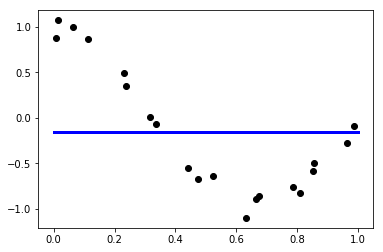

In [3]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


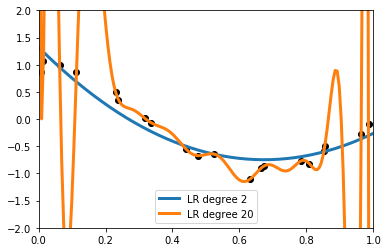

In [4]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Lasso Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

LR degree 20
Lasso 1
Lasso 10000
Lasso 0.0001


C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03877023599009899, tolerance: 0.0011364027615808037
  model = cd_fast.enet_coordinate_descent(


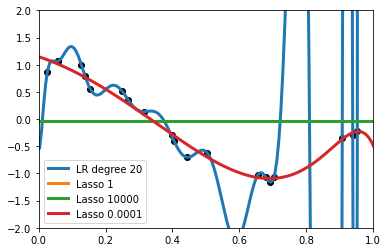

In [4]:
models = []
predicts = []
names=[]
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())))
models.append(("Lasso 1" ,make_pipeline(PolynomialFeatures(20), Lasso(alpha=1))))
models.append(("Lasso 10000" ,make_pipeline(PolynomialFeatures(20),Lasso(alpha=10000))))
models.append(("Lasso 0.0001", make_pipeline(PolynomialFeatures(20),Lasso(alpha=0.0001))))
x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()  

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [9]:
kfold = model_selection.KFold(n_splits=5, random_state=222, shuffle=True)
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                    'lasso__alpha': [0.000001,0.00001,0.0001,0.001,0.01, 0.1, 1, 10, 100, 1000, 10000]},
                    cv=model_selection.KFold(n_splits=5),
                    refit=True)
grid.fit(x, y)
grid.best_params_

C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09575572743006266, tolerance: 0.0005927619360941333
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09168658750472737, tolerance: 0.0009480364725136012
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07885902928711176, tolerance: 0.0010621539185254655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019783594119957226, tolerance: 0.0010621539185254655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002358023475687032, tolerance: 0.0006913801988590241
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001068924460939702, tolerance: 0.0010621539185254655
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conv

{'lasso__alpha': 1e-05, 'polynomialfeatures__degree': 7}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [11]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
from sklearn import  metrics
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Lasso()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5],
                    'lasso__alpha' : [0.001, 0.01, 0.1, 10, 100, 1000]},
                    refit=True)
grid.fit(X,y)
print(grid.best_params_)
print("R^2: {}".format(metrics.r2_score(y, grid.predict(X)))) 

C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.75830402845163, tolerance: 0.43829494374999994
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.382829166373075, tolerance: 0.42183797500000003
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.597547593440307, tolerance: 0.45029244375
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Obj

C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.569857666272277, tolerance: 0.43475869375000004
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.83197973469979, tolerance: 0.43829494374999994
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.78721485777392, tolerance: 0.42183797500000003
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 3}
R^2: 0.9914869731209236


C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95.33317930714986, tolerance: 0.43829494374999994
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95.4754277198127, tolerance: 0.42183797500000003
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.19683637561288, tolerance: 0.45029244375
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Object